# Descripcion
Papemill es un paquete de python que permito reproducir de manera automática jupyer notebooks.  Solo se necesita especificar una serie de parametros.  Se crea un jupyter notebook "plantilla", el cual se corre una vez, y luego desde la terminal, un código python, u otro jupyter notebook se corre la herramienta, y se genera un nuevo fichero jupyter notebook por parámetro sobre el cual hayamos querido iterar.  Aquí usaremos la opción del jupyter notebook, e iteraremos sobre el año en que tenemos datos de satélite de temperatura (como en los tutoriales anterirores).

Pueden leer más sobre esta herramienta aquí:
* https://papermill.readthedocs.io/en/latest/ 
* https://papermill.readthedocs.io/en/latest/usage-execute.html 
* https://medium.com/y-data-stories/automating-jupyter-notebooks-with-papermill-4b8543ece92f 

# Parametros:

In [30]:
dominio = [-110., -105., 20., 25.] #'Mazatlan' lon_min, lon_max, lat_min, lat_max
zona = 'Golfo de California'
nombre_salida = "TEMPLATE_espacial"


In [31]:
print('Zona: ', zona)
print('Dominio: ', dominio)

Zona:  Golfo de California
Dominio:  [-110.0, -105.0, 20.0, 25.0]


In [7]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import glob
from collections import Counter
from netCDF4 import Dataset

import cmocean as cmo



In [32]:
# fichero = '../../../shared-readwrite/ERA5/ERA5_Coarse.nc' ## se cambio el fichero 
fichero = 'C:\\Users\\Lab\\Documents\\imagenes_S2\\20250101120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc'


In [33]:
fileobj = xr.open_dataset(fichero) # importando el archivo
sst = fileobj['analysed_sst'][:] # Leyendo las variables del archivo, como dijimos, un nombre auto-explicativo
sst = sst - 273.15 # convertiendo a Celsius de Kelvin

## Seleccionamos los datos de la zona especificada:

## Nuestra zona al completo:

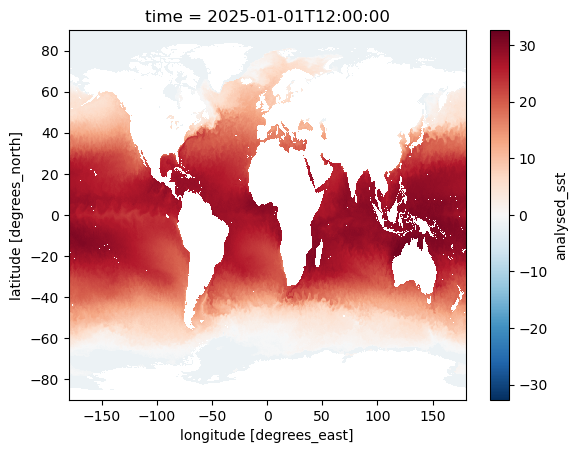

In [34]:
sst.plot()

## Nuestra zona seleccionada:

In [35]:
sst_sel = sst.where((sst.lon > dominio[0]) & 
                    (sst.lon < dominio[1]) &
                    (sst.lat > dominio[2]) &
                    (sst.lat < dominio[3])
                   , drop = True); # El ";" es para que no se muestren los outputs de esta función


In [36]:
print(sst_sel)


<xarray.DataArray 'analysed_sst' (time: 1, lat: 56, lon: 57)> Size: 13kB
array([[[24.316162, 24.302734, 24.331268, ...,       nan,       nan,
               nan],
        [24.247345, 24.211243, 24.225525, ...,       nan,       nan,
               nan],
        [24.204529, 24.210419, 24.172638, ...,       nan,       nan,
               nan],
        ...,
        [21.961182, 21.965393, 21.993073, ...,       nan,       nan,
               nan],
        [21.811798, 21.833618, 21.880615, ...,       nan,       nan,
               nan],
        [21.545776, 21.519745, 21.603668, ...,       nan,       nan,
               nan]]], shape=(1, 56, 57), dtype=float32)
Coordinates:
  * lat      (lat) float32 224B 20.08 20.17 20.26 20.35 ... 24.74 24.83 24.92
  * lon      (lon) float32 228B -110.0 -109.9 -109.8 ... -105.2 -105.2 -105.1
  * time     (time) datetime64[ns] 8B 2025-01-01T12:00:00


In [37]:
sst_sel = sst_sel.squeeze()

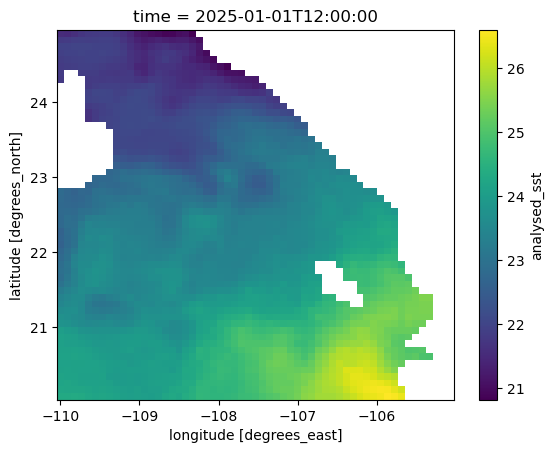

In [38]:
sst_sel.plot()

## Graficamos los valores de temperatura para esa zona:

In [39]:
cmap = cmo.cm.thermal


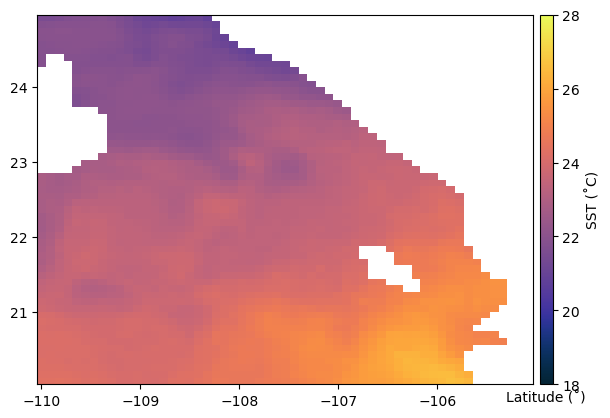

In [42]:
fig, ax = plt.subplots()
image = plt.pcolormesh(sst_sel.lon, sst_sel.lat, sst_sel,cmap=cmap,
                  vmin=18,vmax=28)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)

plt.xlabel('Longitude (˚)')
plt.xlabel('Latitude (˚)')
cbar.set_label('SST (˚C)') 
plt.show()

## Calculamos y visualizamos ahora la anomalía de SST:

### En este caso solo quitaremos una media espacial:

In [43]:
print('La media de SST en el día ' + str(sst_sel.time.values)[0:10] + ' para esta zona fue:', sst_sel.mean().values, '˚C')

La media de SST en el día 2025-01-01 para esta zona fue: 23.550304412841797 ˚C


In [44]:
print('La anomalía de SST en el día ' + str(sst_sel.time.values)[0:10] + ' para esta zona fue:')

La anomalía de SST en el día 2025-01-01 para esta zona fue:


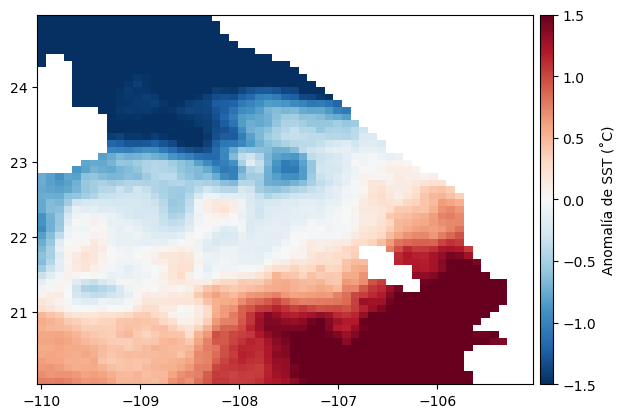

In [45]:
fig, ax = plt.subplots()
image = plt.pcolormesh(sst_sel.lon, sst_sel.lat, sst_sel - sst_sel.mean(), cmap='RdBu_r',
                  vmin=-1.5, vmax=1.5)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])

cbar= plt.colorbar(image, cax=cax)
cbar.set_label('Anomalía de SST (˚C)') 
plt.show()

In [59]:
import subprocess

nombre_entrada = r"C:\Users\Lab\Documents\OHW_intermedio_2025\TEMPLATE_espacial.ipynb"
nombre_salida = r"C:\Users\Lab\Documents\OHW_intermedio_2025\TEMPLATE_espacial.html"

# Usa python -m jupyter para que funcione en cualquier entorno
command = f'python -m jupyter nbconvert --to html --no-input "{nombre_entrada}" --output "{nombre_salida}"'

result = subprocess.run(command, shell=True, capture_output=True, text=True)

print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)

STDOUT:
 
STDERR:
 [NbConvertApp] Converting notebook C:\Users\Lab\Documents\OHW_intermedio_2025\TEMPLATE_espacial.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 546195 bytes to C:\Users\Lab\Documents\OHW_intermedio_2025\TEMPLATE_espacial.html

